# 对电视剧弹幕的挖掘

## 文本预处理

In [92]:
import pandas as pd
import numpy as np

data = pd.read_csv(r'C:\Users\mzjj\Desktop\clean_data.csv')
data=data[data['弹幕内容'].isnull()==False]
book_synopses = data['弹幕内容'].tolist()

import jieba
import re
from zhon.hanzi import punctuation

#中文分词
def tokenize_text(text):
    tokens=[]
    for i in book_synopses:
        token = jieba.lcut(i)
        tokens.append(token)
    return tokens

def remove_stopwords(text):
    stop_words = []
    cleanwords_ini=[]
    cleanwords=[]
    with open(r'C:\所有文件\大三上课程\文本挖掘\chapter4\练习\stop_words.utf8', 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())
        #print(stop_words)
        for i in tokenize_text(text):
            for m in i:
                if m not in stop_words:
                    cleanwords_ini.append(m)
            cleanwords.append(cleanwords_ini)
            cleanwords_ini = []
        return cleanwords

def text_normalize(corpus):
    normalized_corpus_ini=remove_stopwords(corpus)
    normalized_corpus=[]
    #print(normalized_corpus_ini)
    for i in normalized_corpus_ini:
        list=[]
        for m in i:
            if m=="\r\n":
                continue
            list.append(m)
        normalized_corpus.append(list)
    return normalized_corpus
norm_book_synopses = text_normalize(book_synopses)
#print(norm_book_synopses)


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\mzjj\AppData\Local\Temp\jieba.cache
Loading model cost 0.626 seconds.
Prefix dict has been built succesfully.


In [93]:
norm_book_synopses

[['讨厌', '宝玉', '看宝钗', '眼神', '林妹妹', '心里', '难过'],
 ['音量', '调小', '怕', '林之校', '家', '听见'],
 ['贾政好', '无辜', '宝玉'],
 ['焦大说', '事实', '贾府', '败落', '早就', '有迹可循'],
 ['喜欢', '老太太', '搂', '黛玉'],
 ['赵姨娘', '算', '说', '几句', '人话'],
 ['一场', '真像', '新婚', '夫妻'],
 ['周瑞家', '自作主张', '黛玉', '放在', '最后'],
 ['王熙凤', '骂', '贾琏', '一段', '太精彩'],
 ['总', '感觉', '会', '蹦出来', '一只', '猴子'],
 ['宝钗', '这点', '做', '有点', '厚道'],
 ['这袭', '找', '宝玉', '找', '宝玉', '路上'],
 ['不敢', '得罪', '王熙凤'],
 ['凤姐', '一心', '家', '居然', '最后', '家里人', '给害'],
 ['贾宝玉', '表现', '林妹妹', '伤心'],
 ['确实', '过分', '林妹妹', '客人', '应该', '先', '林妹妹', '挑花'],
 ['不好意思', '本来', '应该', '先给', '黛玉'],
 ['看到', '没', '觉得', '王熙凤', '坏', '人无完人'],
 ['说黛玉', '第三者', '仔细', '皮'],
 ['原来', '曹雪芹', '精致', '骚气'],
 ['色', '字头', '一把', '刀', '石榴裙', '乱葬岗'],
 ['说', '王熙凤', '坏', '看着', '魄力', '人物'],
 ['贾芸', '马上', '艺术', '聊天', '哄', '回凤姐'],
 ['本来', '魔幻', '剧绛珠', '仙草', '化成', '人形', '讲', '科学'],
 ['原著', '心机', '本来', '污蔑', '黛玉'],
 ['宝钗', '真作', '得不到', '喜欢', '脸', '叭叭'],
 ['黛玉', '释怀', '便', '很少', '宝玉', '置气'],
 ['北静王', '做', '咒', '妾'],
 ['袭', 

## 基础性描述分析

In [1]:
import pandas as pd
movie_data = pd.read_csv(r'C:\Users\mzjj\Desktop\clean_data.csv')
movie_data=movie_data[movie_data['弹幕内容'].isnull()==False]
movie_synopses = movie_data['弹幕内容'].tolist()

### 收到最多点赞的用户柱状图

In [94]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
#配置中文显示
plt.rcParams['font.family'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,10))
salesDf = pd.read_csv(r'C:\Users\mzjj\Desktop\clean_data.csv',index_col='用户名')
salesSeries = salesDf['点赞数']
salesGroup = salesSeries.groupby(by=salesSeries.index)
salesSum = salesGroup.sum()
salesSum.sort_values(inplace=True,ascending=False)
'''salesSum[:10].plot.bar(grid=False,edgecolor='white',linewidth=0.5)
plt.xticks(rotation=60,size=15)
plt.title("点赞前十用户")
plt.ylabel('点赞数')
plt.show()'''
c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.WONDERLAND))
    .add_xaxis(salesSum[:10].index.to_list())
    .add_yaxis("",salesSum[:10].to_list())
    .set_global_opts(title_opts=opts.TitleOpts(title="点赞前十用户",subtitle="数据分析：红楼梦 ",pos_left = 'left'),
#                        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size=13)), #更改横坐标字体大小
                       yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size=13)), #更改纵坐标字体大小
                       xaxis_opts=opts.AxisOpts(
            axislabel_opts={"interval":"0"}
        )


                       )
    .set_series_opts(label_opts=opts.LabelOpts(font_size=16,position='top'))
    )
c.render_notebook()

<Figure size 1440x720 with 0 Axes>

### 各期弹幕数折线图

In [47]:
#可视化库
import pandas as pd
from pyecharts.charts import *
from pyecharts import options as opts
from pyecharts.globals import ThemeType


#error_bad_lines参数可忽略异常行
df = pd.read_csv(r'C:\Users\mzjj\Desktop\clean_data.csv')

df = df.drop_duplicates() #删除重复行
df = df.dropna() #删除存在缺失值的行

#弹幕分布
tmp1=[]
for i in df['期数']:
    tmp1.append(i)

df['各期弹幕数'] = tmp1
df8 = df["各期弹幕数"].value_counts(sort=False)
print(df8.index.to_list())
print(df8.to_list())
c = (
    Line()
    .add_xaxis(sorted(df8.index.to_list()))   # 指定x/y轴数据
    .add_yaxis("",df8.to_list())   # is_step=True 表示呈梯状显示数据
    .set_global_opts(title_opts=opts.TitleOpts(title="各期弹幕数",subtitle="数据分析：红楼梦 ",pos_left = 'left'),
                       yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size=13)), #更改纵坐标字体大小
                       xaxis_opts=opts.AxisOpts(
            axislabel_opts={"interval":"0"}
        )
)
)
c.render_notebook()

[1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3, 30, 31, 32, 33, 34, 35, 36, 4, 5, 6, 7, 8, 9]
[21224, 17449, 13509, 20577, 18929, 20174, 14044, 15304, 17705, 17592, 17444, 15683, 13421, 15882, 10113, 11564, 12710, 19594, 20903, 16476, 19629, 13178, 17054, 14309, 12224, 17334, 26563, 15418, 17410, 18786, 16696, 18120, 17338, 16847, 17002, 16999]


### 收到最多点赞的用户柱状图

In [90]:
df = pd.read_csv(r'C:\Users\mzjj\Desktop\clean_data.csv',index_col='弹幕ID')
temp=df['点赞数'].sort_values(ascending=False)
c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.WONDERLAND))
    .add_xaxis(temp.head(6).index.to_list())
    .add_yaxis("",temp.head(6).to_list())
    .set_global_opts(title_opts=opts.TitleOpts(title="点赞前六弹幕",subtitle="数据分析：红楼梦 ",pos_left = 'left'),
#                        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size=13)), #更改横坐标字体大小
                       yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size=13)), #更改纵坐标字体大小
                       xaxis_opts=opts.AxisOpts(
            axislabel_opts={"interval":"0"}
        )


                       )
    .set_series_opts(label_opts=opts.LabelOpts(font_size=16,position='top'))
    )
c.render_notebook()

## LDA主题分析

In [101]:
range(0,680344)

range(0, 680344)

the info of this ldamodel: 

num of testset: 136069; size_dictionary: 89632; num of topics: 1
the perplexity of this ldamodel is : 214653765.81284866
the info of this ldamodel: 

num of testset: 136069; size_dictionary: 89632; num of topics: 2
the perplexity of this ldamodel is : 148445765.3043774
the info of this ldamodel: 

num of testset: 136069; size_dictionary: 89632; num of topics: 3
the perplexity of this ldamodel is : 117888777.48351668
the info of this ldamodel: 

num of testset: 136069; size_dictionary: 89632; num of topics: 4
the perplexity of this ldamodel is : 95385689.98529784
the info of this ldamodel: 

num of testset: 136069; size_dictionary: 89632; num of topics: 5
the perplexity of this ldamodel is : 81727463.3141679
the info of this ldamodel: 

num of testset: 136069; size_dictionary: 89632; num of topics: 6
the perplexity of this ldamodel is : 68909657.61048248
the info of this ldamodel: 

num of testset: 136069; size_dictionary: 89632; num of topics: 7
the perplex

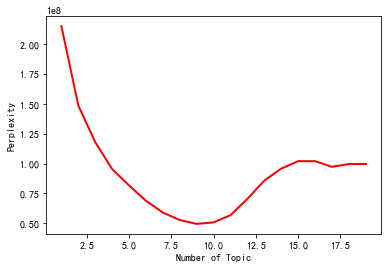

In [102]:
#利用困惑度确定最优主题个数
import math
import matplotlib.pyplot as plt
def perplexity(ldamodel, testset, dictionary, size_dictionary, num_topics):
    """calculate the perplexity of a lda-model"""
    '''testset: gensim corpus, weighted by tf'''
    # dictionary : {7822:'deferment', 1841:'circuitry',19202:'fabianism'...]
    print ('the info of this ldamodel: \n')
    print ('num of testset: %s; size_dictionary: %s; num of topics: %s'%(len(testset), size_dictionary, num_topics))
    prep = 0.0
    prob_doc_sum = 0.0
    topic_word_list = [] # store the probablity of topic-word:[(u'business', 0.010020942661849608),(u'family', 0.0088027946271537413)...]
    for topic_id in range(num_topics):
        topic_word = ldamodel.show_topic(topic_id, size_dictionary)
        dic = {}
        for word, probability in topic_word:
            dic[word] = probability
        topic_word_list.append(dic)
    doc_topics_ist = [] #store the doc-topic tuples:[(0, 0.0006211180124223594),(1, 0.0006211180124223594),...]
    for doc in testset:
        doc_topics_ist.append(ldamodel.get_document_topics(doc, minimum_probability=0))
    testset_word_num = 0# store the number of words in testset
    for i in range(len(testset)):
        prob_doc = 0.0 # the probablity of the doc
        doc = testset[i]
        doc_word_num = 0 # the num of words in the doc
        for word_id, num in doc:
            prob_word = 0.0 # the probablity of the word
            doc_word_num += num
            word = dictionary[word_id]
            for topic_id in range(num_topics):
                # cal p(w) : p(w) = sumz(p(z)*p(w|z))
                prob_topic = doc_topics_ist[i][topic_id][1]#p(z|d)
                prob_topic_word = topic_word_list[topic_id][word]
                prob_word += prob_topic*prob_topic_word
            prob_doc += math.log(prob_word) # p(d) = sum(log(p(w)))
        prob_doc_sum += prob_doc
        testset_word_num += doc_word_num
    prep = math.exp(-prob_doc_sum/testset_word_num) # perplexity = exp(-sum(p(d)/sum(Nd))
    print ("the perplexity of this ldamodel is : %s"%prep)
    return prep

def graph_draw(topic, perplexity):  # 做主题数与困惑度的折线图
    x = topic
    y = perplexity
    plt.plot(x, y, color="red", linewidth=2)
    plt.xlabel("Number of Topic")
    plt.ylabel("Perplexity")
    plt.show()

import random
random.setstate(random.getstate())
train_number = int(len(norm_book_synopses)*0.8)
#print(int(len(norm_book_synopses)))#2822
list=[]
for i in range(0,680344):
    list.append(i)
corpus_index=list
train_index=random.sample(corpus_index,train_number)
#print(train_number)
train_corpus=[]
test_corpus=[]
for i in range(len(norm_book_synopses)):
    if i in train_index:
        train_corpus.append(norm_book_synopses[i])
    else:
        test_corpus.append(norm_book_synopses[i])


from gensim import corpora, models
#build the dictionary
dictionary=corpora.Dictionary(train_corpus)
#print(dictionary.token2id)
#convert tokenized documents into bag of words vectos
train_corpus_bow=[dictionary.doc2bow(text) for text in train_corpus]
test_corpus_bow=[dictionary.doc2bow(text) for text in test_corpus]
#tfidf vectors
tfidf=models.TfidfModel(train_corpus_bow)
train_corpus_tfidf=tfidf[train_corpus_bow]
test_corpus_tfidf=tfidf[test_corpus_bow]
topic_range=range(1,20)#k的变化范围
p=[]
for i in topic_range:
    total_topics=i
    lda_tfidf=models.LdaModel(train_corpus_tfidf,id2word=dictionary,iterations=1000,num_topics=total_topics)
    prep=perplexity(lda_tfidf, test_corpus_tfidf, dictionary, size_dictionary=len(dictionary.keys()), num_topics=total_topics)
    p.append(prep)
graph_draw(topic_range, p)


In [105]:
#train LDA model
from gensim import corpora,models
#build the dictionary
dictionary=corpora.Dictionary(norm_book_synopses)
#print(dictionary.token2id)
#convert tokenized documents into bag of words vectos
corpus_bow=[dictionary.doc2bow(text) for text in norm_book_synopses]
#print(corpus_bow)
#tfidf vectors
tfidf=models.TfidfModel(corpus_bow)
corpus_tfidf=tfidf[corpus_bow]
#print(corpus_tfidf)
#LDA
total_topics=9
lda_bow=models.LdaModel(corpus_bow,id2word=dictionary,iterations=10000,num_topics=total_topics)
lda_tfidf=models.LdaModel(corpus_tfidf,id2word=dictionary,iterations=10000,num_topics=total_topics)

#view the results
for i in range(total_topics):
    print(lda_tfidf.show_topic(i))
# view the topic distribution of review[1]
print(lda_tfidf.get_document_topics(corpus_tfidf[1]))

[('怡红院', 0.03851206), ('哭', 0.02976289), ('喜欢', 0.025504781), ('黛玉', 0.023460384), ('笑', 0.02026243), ('宝玉', 0.018873077), ('死', 0.012844384), ('女儿', 0.012184848), ('爱', 0.0119327335), ('有人', 0.011590717)]
[('回来', 0.022249855), ('娘娘', 0.019732688), ('眼镜', 0.017892696), ('元春', 0.017490774), ('这是', 0.011756342), ('贾家', 0.011106829), ('皇宫', 0.010778995), ('删', 0.0106929345), ('诗', 0.010078027), ('潇湘', 0.008597983)]
[('漂亮', 0.025313284), ('87', 0.021454409), ('可怜', 0.020447338), ('见', 0.014466283), ('字', 0.013504464), ('演员', 0.012451177), ('前面', 0.012163818), ('妃子', 0.011613378), ('版', 0.009753211), ('场面', 0.009499463)]
[('秦可卿', 0.03284765), ('写', 0.022122705), ('曹雪芹', 0.01864215), ('清朝', 0.01694077), ('作弊', 0.016474621), ('排场', 0.012878237), ('明朝', 0.010961827), ('进宫', 0.01067756), ('朝代', 0.010120224), ('说', 0.0083984295)]
[('哈哈哈', 0.02183731), ('经典', 0.018295174), ('红楼梦', 0.013803236), ('美', 0.012051776), ('红楼', 0.012011657), ('看不懂', 0.011662807), ('以前', 0.011075066), ('元春', 0.0108769545

In [106]:
import pyLDAvis.gensim_models
data=pyLDAvis.gensim_models.prepare(lda_tfidf,corpus_tfidf,dictionary)
#pyLDAvis.display(data)
pyLDAvis.save_html(data, 'k=9.html')

C:\python\anaconda3\envs\deeplearning\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


## 弹幕情感分析

### 基于SnowNLP

In [107]:
import pandas as pd
import numpy as np

data = pd.read_csv(r'C:\Users\mzjj\Desktop\clean_data.csv')
data=data[data['弹幕内容'].isnull()==False]
#情感打分
from snownlp import SnowNLP
a=data.sample(10000)
a['情感得分'] = a["弹幕内容"].apply(lambda x:SnowNLP(x).sentiments)#弹幕这一列中的每一个元素调用SnowNLP（）并进行情感打分
#当一个函数的参数存在于一个元组或者一个字典中时，用来间接的调用这个函数，并将元组或者字典中的参数按照顺序传递给参数

In [24]:
a.sample(10)

,弹幕ID,用户名,弹幕内容,发布时间,点赞数,期数,情感得分
394992,7.656120e+16,Deter,你不用多嘴,2091,0,28,0.649400
14596,7.656120e+16,牛,问不开正门的百度去,1594,0,1,0.374291
499471,7.656120e+16,下个路口见,她有抑郁症,1477,1,33,0.882439
413546,7.656120e+16,只只,活在童话里的人,1591,0,29,0.976399
115124,7.656120e+16,在健身房练死劲儿,我算是看明白了宝玉就二彪子一个,1099,0,14,0.921487
21149,7.656120e+16,NaN,还原度真的高,2341,0,1,0.505303
268432,7.656120e+16,阿丽塔,故意欺负她们新上任很多规矩不清楚,1704,0,21,0.633263
532904,7.656120e+16,空白格,人都会有点私心,1757,0,34,0.673042
566222,7.656120e+16,郭创业,刘姥姥其实真的算好的了还有芸儿,1089,1,36,0.971785
614161,7.656120e+16,豆总,书里能当大丫头得都是人精这个丫头傻子一般,1980,0,5,0.805628


C:\python\anaconda3\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

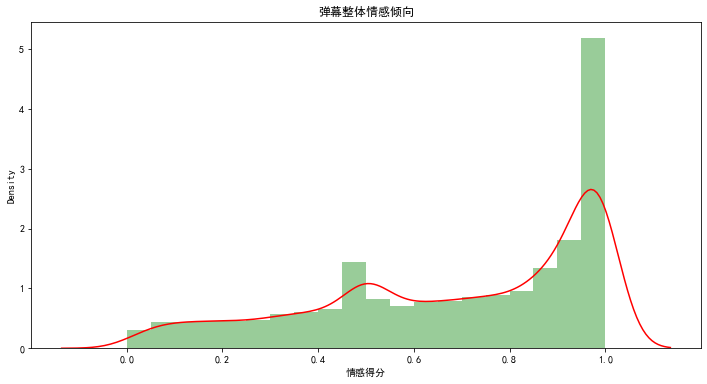

In [25]:
# %matplotlib inline
#可视化库
import stylecloud
import matplotlib.pyplot as plt 
import seaborn as sns
from pyecharts.charts import *
from pyecharts import options as opts 
from pyecharts.globals import ThemeType  
from IPython.display import Image 
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置加载的字体名
plt.rcParams['axes.unicode_minus'] = False   # 解决保存图像是负号'-'显示为方块的问题 
plt.figure(figsize=(12, 6)) #设置画布大小
rate = a['情感得分']
ax = sns.distplot(rate,
             hist_kws={'color':'green','label':'直方图'},
             kde_kws={'color':'red','label':'密度曲线'},
             bins=20) #参数color样式为salmon，bins参数设定数据片段的数量
ax.set_title("弹幕整体情感倾向")
#plt.savefig('D:\\Desktop\\存储课大作业\\导出的图片.png')
plt.show

In [28]:
mapping = {'黛玉':'林黛玉|林妹妹|黛玉', '宝玉':'贾宝玉|宝玉|宝二爷', '宝钗':'薛宝钗|宝钗','王熙凤':'凤姐|凤哥|凤哥儿|凤姐儿','探春':'探春','贾母':'贾母|老太太','刘姥姥':'姥姥|刘姥姥'}#字典
for key, value in mapping.items():
    a[key] = a['弹幕内容'].str.contains(value)
average_value = pd.Series({key: a.loc[a[key], '情感得分'].mean() for key in mapping.keys()})
print(average_value.sort_values())

王熙凤    0.581903
贾母     0.733765
探春     0.825813
宝玉     0.867573
黛玉     0.884591
刘姥姥    0.905176
宝钗     0.922942
dtype: float64


### 基于情感词典

In [45]:
b=data.sample(5000)

In [46]:
import jieba
import codecs
#载入情感词典
# 打开词典文件，返回列表
def open_dict(Dict='hahah',path='C:/所有文件/大三上课程/文本挖掘/chapter6(1)/'):
    path = path + '%s.txt' %Dict
    f= codecs.open(path, 'r', encoding='utf-8-sig',errors='ignore')#encoding='utf-8-sig',检查是否有文件头，并去掉
    dictionary=f.readlines()
    dict = []
    for word in dictionary:
        word=word.strip()
        word=word.strip(' ')
        dict.append(word)
    f.close()
    return dict
posdict = open_dict(Dict='posdict')#积极情感词典
negdict = open_dict(Dict='negdict')#消极情感词典
inversedict=open_dict(Dict='inversedict')
mostdict = open_dict(Dict='mostdict')
verydict= open_dict(Dict='verydict')
moredict = open_dict(Dict='moredict')
ishdict = open_dict(Dict='ishdict')
insufficientdict = open_dict(Dict='insufficientdict')

#分句
def cut_sentence(words):
    start = 0
    i = 0
    sents = []
    token=[]
    punt_list = ',.!?:;~，。！？：；～'
    for word in words:
        if word in punt_list and token not in punt_list: #检查标点符号下一个字符是否还是标点
            sents.append(words[start:i+1])
            start = i+1
            i += 1
        else:
            i += 1
            token = list(words[start:i+2]).pop() # 取下一个字符
    if start < len(words):
        sents.append(words[start:])
    return sents

#定义判断奇偶的函数
def judgeodd(num):
    if num%2==0:
        return 'even'
    else:
        return 'odd'
    

#计算正、负和总的情感得分
def sentiment(review):
    sents=cut_sentence(review)
    #print(sents)
    pos_senti=0#段落的情感得分
    neg_senti=0
    total_senti=0
    for sent in sents:
        pos_count=0#句子的情感得分
        neg_count=0
        seg=jieba.lcut(sent,cut_all=False)
        #print(sent)
        i = 0 #记录扫描到的词的位置
        a = 0 #记录情感词的位置
        poscount = 0 #正向词的第一次分值
        poscount2 = 0 #正向词反转后的分值
        poscount3 = 0 #正向词的最后分值
        negcount = 0 #负向词的第一次分值
        negcount2 = 0 #负向词反转后的分值
        negcount3 = 0 #负向词的最后分值
        for word in seg:
            #print(word)
            poscount=0
            negcount=0
            if word in posdict: #判断词语是否是情感词
                poscount += 1                
                c = 0 #情感词前否定词的个数
                for w in seg[a:i]:  #扫描情感词前的程度词
                    if w in mostdict:
                        poscount *= 4.0
                    elif w in verydict:
                        poscount *= 3.0
                    elif w in moredict:
                        poscount *= 2.0
                    elif w in ishdict:
                        poscount /= 2.0
                    elif w in insufficientdict:
                        poscount /= 4.0
                    elif w in inversedict:
                        c += 1
                if judgeodd(c) == 'odd': #扫描情感词前的否定词数
                    poscount *= -1.0
                    poscount2 += poscount
                    poscount = 0
                    poscount3 = poscount + poscount2 + poscount3
                    poscount2 = 0
                else:
                    poscount3 = poscount + poscount2 + poscount3
                    poscount = 0
                a = i + 1 #情感词的位置变化
            elif word in negdict: #消极情感的分析，与上面一致
                negcount += 1
                d = 0
                for w in seg[a:i]:
                    if w in mostdict:
                        #print(w)
                        negcount *= 4.0
                    elif w in verydict:
                        #print(w)
                        negcount *= 3.0
                    elif w in moredict:
                        #print(w)
                        negcount *= 2.0
                    elif w in ishdict:
                        #print(w)
                        negcount /= 2.0
                    elif w in insufficientdict:
                        #print(w)
                        negcount /= 4.0
                    elif w in inversedict:
                        d += 1
                if judgeodd(d) == 'odd':
                    negcount *= -1.0
                    negcount2 += negcount
                    negcount = 0
                    negcount3 = negcount + negcount2 + negcount3
                    negcount2 = 0
                else:
                    negcount3 = negcount + negcount2 + negcount3
                    negcount = 0
                a = i + 1                  
            i += 1 #扫描词位置前移
        if poscount3 < 0 and negcount3 >=0:
            neg_count += negcount3 - poscount3
            pos_count = 0
        elif negcount3 < 0 and poscount3 >= 0:
            pos_count = poscount3 - negcount3
            neg_count = 0
        elif poscount3 < 0 and negcount3 < 0:
            neg_count = -poscount3
            pos_count = -negcount3
        else:
            pos_count = poscount3
            neg_count = negcount3
        #print(pos_count,neg_count)
        pos_senti=pos_senti+pos_count
        neg_senti=neg_senti+neg_count
    total_senti=pos_senti-neg_senti
    return total_senti

for indexs in b.index:
    b.loc[indexs, "dict_score"]=sentiment(b.loc[indexs]["弹幕内容"])

In [51]:
b.sample(50)

,弹幕ID,用户名,弹幕内容,发布时间,点赞数,期数,dict_score
500324,7.656120e+16,洁,像薛宝钗这样的人都是长命百岁的,1591,0,33,2.0
130104,7.656120e+16,荷叶红你是万绿中一点红,又来坑了,235,0,15,-1.0
267656,7.656120e+16,嘉,王熙凤小月了,1583,0,21,0.0
637693,7.656120e+16,酷九岁,好,2432,0,6,1.0
107807,7.656120e+16,楞伽山人,一语成谶,312,2,14,1.0
692261,7.656120e+16,triumph,这俩是正宗的亲姐弟,1562,0,9,2.0
331914,7.656120e+16,JOJO,先让柳湘莲去了解一下啊,2629,0,25,0.0
285602,7.656120e+16,柳宝,秦显家的在行贿,1930,0,22,0.0
407449,7.656120e+16,沈小平,要我杀他灭口,680,0,29,1.0
334172,7.656120e+16,自定义,你们贾府恐怕就门外的石狮子最干净,2923,0,25,4.0


C:\python\anaconda3\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

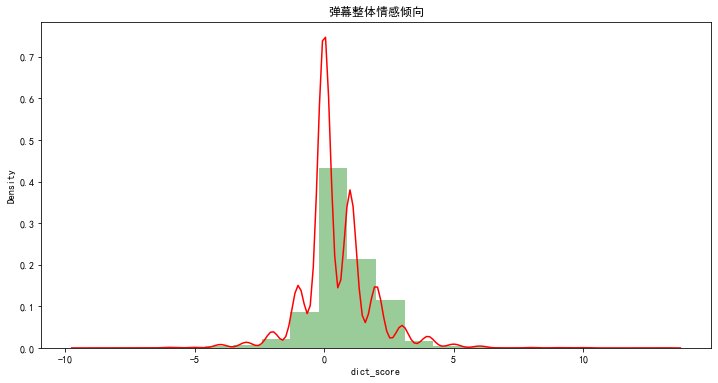

In [52]:
# %matplotlib inline
#可视化库
import stylecloud
import matplotlib.pyplot as plt 
import seaborn as sns
from pyecharts.charts import *
from pyecharts import options as opts 
from pyecharts.globals import ThemeType  
from IPython.display import Image 
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置加载的字体名
plt.rcParams['axes.unicode_minus'] = False   # 解决保存图像是负号'-'显示为方块的问题 
plt.figure(figsize=(12, 6)) #设置画布大小
rate = b['dict_score']
ax = sns.distplot(rate,
             hist_kws={'color':'green','label':'直方图'},
             kde_kws={'color':'red','label':'密度曲线'},
             bins=20) #参数color样式为salmon，bins参数设定数据片段的数量
ax.set_title("弹幕整体情感倾向")
#plt.savefig('D:\\Desktop\\存储课大作业\\导出的图片.png')
plt.show

In [53]:
mapping = {'黛玉':'林黛玉|林妹妹|黛玉', '宝玉':'贾宝玉|宝玉|宝二爷', '宝钗':'薛宝钗|宝钗','王熙凤':'凤姐|凤哥|凤哥儿|凤姐儿','探春':'探春','贾母':'贾母|老太太','刘姥姥':'姥姥|刘姥姥'}#字典
for key, value in mapping.items():
    b[key] = b['弹幕内容'].str.contains(value)
average_value = pd.Series({key: b.loc[b[key], 'dict_score'].mean() for key in mapping.keys()})
print(average_value.sort_values())

贾母     0.650000
刘姥姥    0.652941
宝玉     0.663212
王熙凤    0.687500
黛玉     0.690955
宝钗     0.696226
探春     0.803922
dtype: float64
